In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import mplleaflet
import yaml
%matplotlib inline

In [2]:
rorys_athlete_id = 23193264
my_sat_long_run_id = 1187151815

In [3]:
with open('secrets.yaml') as f:
    x = yaml.load(f)

# List Activities

Get ID of latest activity

In [79]:
list(x)

['Client ID', 'Client Secret', 'Access Token']

In [80]:
get_url = 'https://www.strava.com/api/v3/athlete/activities'

In [81]:
r = requests.get(get_url,
                 params={'access_token': x['Access Token']})

In [84]:
activities = r.json()

In [99]:
latest_activity_id = activities[0]['id']

In [5]:
types = ','.join(['latlng', 'time', 'distance'])
types

'latlng,time,distance'

In [100]:
get_url = 'https://www.strava.com/api/v3/activities/{}/streams/{}'.format(latest_activity_id, types)

In [101]:
r = requests.get(get_url,
                 params={'access_token': x['Access Token']})

In [102]:
y = r.json()

# Conversion to DataFrame

Need to extract and convert to a pretty dataframe with time, distance, lat, and lon.

In [103]:
dist_df = pd.DataFrame({'time': y[1]['data'], 'distance': y[2]['data']})

In [104]:
dist_df.head()

,distance,time
0,2.9,0
1,5.6,1
2,28.0,8
3,49.0,14
4,69.0,21


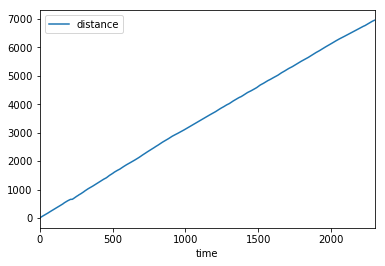

In [105]:
dist_df.plot(x='time', y='distance')

In [106]:
dist_df['speed'] = dist_df.distance.diff()/dist_df.time.diff()

In [107]:
dist_df['smoothed_speed'] = dist_df.speed.rolling(5).mean()

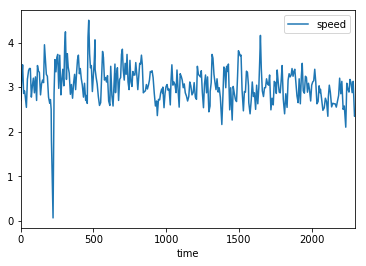

In [108]:
dist_df.plot(x='time', y='speed')

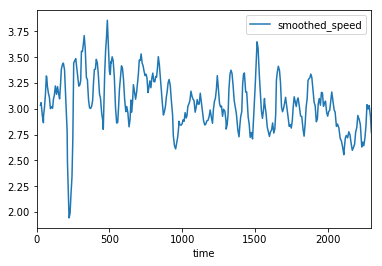

In [109]:
dist_df.plot(x='time', y='smoothed_speed')

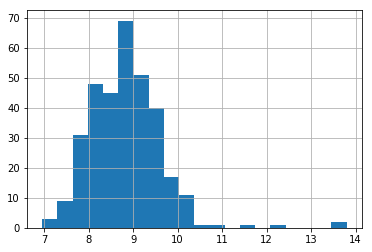

In [110]:
meter_per_sec_to_mile_per_min = 0.03728

(1/(dist_df.smoothed_speed*meter_per_sec_to_mile_per_min)).hist(bins=20)

# GPS Data

In [111]:
gps_df = pd.DataFrame(y[0]['data'], 
                      columns=['lat', 'lon'])

In [112]:
gps_df.head()

,lat,lon
0,37.457184,-122.180080
1,37.457192,-122.180109
2,37.457295,-122.180326
3,37.457406,-122.180517
4,37.457550,-122.180650


In [113]:
plt.figure(figsize=(8, 8))
gps_df.plot.scatter(x='lon',
                    y='lat',
                    ax=plt.gca())
mplleaflet.display()